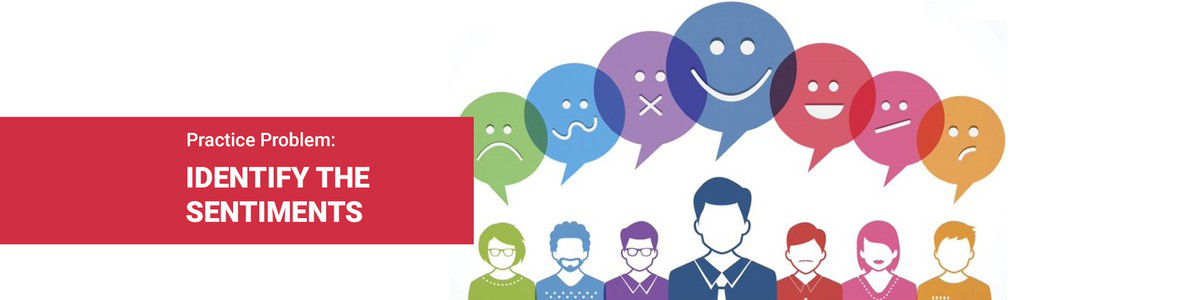

In [1]:
'''Identify the Sentiments'''

from PIL import Image
read_image=Image.open('C:\\Users\\srfc\\Desktop\\sentiments_1920x480-thumbnail-1200x1200-90.jpg')
read_image


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
ps=PorterStemmer()


In [3]:
#nltk.download('stopwords')

In [4]:
Train=pd.read_csv('C:\\Users\\srfc\\Downloads\\train_2kmZucJ.csv')
Train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
Train.shape

(7920, 3)

In [6]:
x=Train.tweet
y=Train.label

In [7]:
x.shape,y.shape

((7920,), (7920,))

In [8]:
wnl=WordNetLemmatizer()
corpus=[]
for i in range(0,len(Train)):
    review=re.sub('[^a-zA-Z]',' ',Train['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[wnl.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    review=" ".join(review)
    corpus.append(review)

In [9]:
corpus

['fingerprint pregnancy test http goo gl h mfqv android apps beautiful cute health igers iphoneonly iphonesia iphone',
 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias http instagram com p yget jc jm',
 'love would go talk makememories unplug relax iphone smartphone wifi connect http fb n lsupcu',
 'wired know george made way iphone cute daventry home http instagr p li ujs k',
 'amazing service apple even talk question unless pay stupid support',
 'iphone software update fucked phone big time stupid iphones',
 'happy u instapic instadaily u sony xperia xperiaz http instagram com p z qgfwlvj',
 'new type c charger cable uk http www ebay co uk itm bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc',
 'bout go shopping listening music iphone justme music likeforlike followforfollow http instagr p vj bg tlql',
 'photo fun selfie pool water sony camera pic

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
TFIDF=TfidfVectorizer()

In [21]:


x=TFIDF.fit_transform(corpus)


In [22]:
x

<7920x21616 sparse matrix of type '<class 'numpy.float64'>'
	with 109307 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5544, 21616), (2376, 21616), (5544,), (2376,))

In [26]:
from sklearn.naive_bayes import MultinomialNB


NB=MultinomialNB()



In [27]:
NB.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
y_pred=NB.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
cm = confusion_matrix(y_test,y_pred)

In [31]:
cm

array([[1732,   40],
       [ 354,  250]], dtype=int64)

In [32]:
score=accuracy_score(y_test,y_pred)
score*100

83.41750841750842

In [33]:
#!pip install xgboost
#!pip install xgboost

In [34]:
import xgboost
from xgboost import XGBClassifier

In [35]:
xgb=XGBClassifier()

In [36]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [37]:
y_pred_xgb=xgb.predict(x_test)

In [38]:


cm_xgb=confusion_matrix(y_test,y_pred_xgb)
cm_xgb



array([[1614,  158],
       [ 129,  475]], dtype=int64)

In [39]:
score_xgb=accuracy_score(y_test,y_pred_xgb)
score_xgb*100

87.92087542087542

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf= RandomForestClassifier()

In [42]:
rf.fit(x_train,y_train)

C:\Users\srfc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
y_pred_rf=rf.predict(x_test)

In [44]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
cm_rf


array([[1649,  123],
       [ 192,  412]], dtype=int64)

In [45]:
score_rf=accuracy_score(y_test,y_pred_rf)
score_rf*100

86.74242424242425

In [46]:
Test=pd.read_csv('C:\\Users\\srfc\\Downloads\\test_oJQbWVk.csv')
Test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [47]:
Test.shape

(1953, 2)

In [48]:
wnl=WordNetLemmatizer()
corpus=[]
for i in range(0,len(Test)):
    review=re.sub('[^a-zA-Z]',' ',Test['tweet'][i])
    review=review.lower()
    review=review.split()
    review=[wnl.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    review=" ".join(review)
    corpus.append(review)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
Test_x=TFIDF.transform(corpus)

In [51]:
Test_x.shape

(1953, 21616)

In [52]:
y_pred_Test=NB.predict(Test_x)

In [53]:
y_pred_Test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [57]:
data=Test['id']

In [58]:
data1=np.array(y_pred_Test)
print(data1)

[1 0 0 ... 1 0 0]


In [60]:
dataset = pd.DataFrame({'id': data, 'label': data1})
dataset.head()

,id,label
0,7921,1
1,7922,0
2,7923,0
3,7924,0
4,7925,0


In [70]:
dataset.to_csv('Submission_Kumar_Gaurav.csv')